# PROSPER LOAN DATA ANALYSIS
## by Subomi Oyewole

## Introduction
> In this project Exploratory Data Analysis (EDA) is carried out on a dataset from Prosper. Prosper is America’s first marketplace lending platform, with over \\$9 billion dollars in funded loans. This data set contains 113,937 loans with 81 variables on each loan,  including loan amount, borrower income, borrower rate (or interest rate), current loan  status, borrower credit  history, borrower employment status, the latest payment information and much more.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read the dataset into a dataframe
df_og = pd.read_csv("prosperLoanData.csv")

df_og.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#programmatic assessment of the dataframe
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### DATA WRANGLING

In [4]:
#creating a copy for cleaning purposes
loan = df_og.copy()

In [5]:
#converting all the features to lower case for consistency purposes
loan.columns = map(str.lower, loan.columns)
loan.columns

Index(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade',
       'term', 'loanstatus', 'closeddate', 'borrowerapr', 'borrowerrate',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating (numeric)', 'prosperrating (alpha)',
       'prosperscore', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangelower', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'totalcreditlinespast7years', 'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months', 'totalinquiries',
       'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availa

In [6]:
#renaming columns with unwanted spaces
loan.rename(columns={'listingcategory (numeric)':'listingcategory', 'prosperrating (alpha)':'prosperrating'}, inplace = True)

In [7]:
#filling rows with nan values with zeros 
loan["creditscorerangelower"].fillna(0, inplace=True)

loan["creditscorerangeupper"].fillna(0, inplace=True)

#changing the datatype to integer for calculation purposes
loan = loan.astype({"creditscorerangeupper":'int', 'creditscorerangelower':'int'})

#creating average credit score column
loan["avg_creditscore"] = ((loan["creditscorerangeupper"] + loan["creditscorerangelower"])/2)

In [8]:
#converting column with date to datetime column
loan["loanoriginationdate"] = pd.to_datetime(loan["loanoriginationdate"])

In [9]:
# creating the year column 
loan["year"] = loan["loanoriginationdate"].dt.year


In [10]:
#creating a dataframe for features necessary for this analysis
colszy = ["listingnumber", "term", "loanstatus", "borrowerapr", "borrowerrate", "prosperrating", "listingcreationdate",
          "listingcategory", "prosperscore", "borrowerstate", "occupation", "employmentstatus", "isborrowerhomeowner",
          "incomerange", "loanoriginalamount", "loanoriginationdate", "year", "avg_creditscore"
         ]
df = loan[colszy]

In [11]:
#confirming if changes have been made correctly so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   listingnumber        113937 non-null  int64         
 1   term                 113937 non-null  int64         
 2   loanstatus           113937 non-null  object        
 3   borrowerapr          113912 non-null  float64       
 4   borrowerrate         113937 non-null  float64       
 5   prosperrating        84853 non-null   object        
 6   listingcreationdate  113937 non-null  object        
 7   listingcategory      113937 non-null  int64         
 8   prosperscore         84853 non-null   float64       
 9   borrowerstate        108422 non-null  object        
 10  occupation           110349 non-null  object        
 11  employmentstatus     111682 non-null  object        
 12  isborrowerhomeowner  113937 non-null  bool          
 13  incomerange   

In [12]:
df.head()

,listingnumber,term,loanstatus,borrowerapr,borrowerrate,prosperrating,listingcreationdate,listingcategory,prosperscore,borrowerstate,occupation,employmentstatus,isborrowerhomeowner,incomerange,loanoriginalamount,loanoriginationdate,year,avg_creditscore
0,193129,36,Completed,0.16516,0.1580,NaN,2007-08-26 19:09:29.263000000,0,NaN,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12,2007,649.5
1,1209647,36,Current,0.12016,0.0920,A,2014-02-27 08:28:07.900000000,2,7.0,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03,2014,689.5
2,81716,36,Completed,0.28269,0.2750,NaN,2007-01-05 15:00:47.090000000,0,NaN,GA,Other,Not available,False,Not displayed,3001,2007-01-17,2007,489.5
3,658116,36,Current,0.12528,0.0974,A,2012-10-22 11:02:35.010000000,16,9.0,GA,Skilled Labor,Employed,True,"$25,000-49,999",10000,2012-11-01,2012,809.5
4,909464,36,Current,0.24614,0.2085,D,2013-09-14 18:38:39.097000000,2,4.0,MN,Executive,Employed,True,"$100,000+",15000,2013-09-20,2013,689.5


In [13]:
#checking shape of dataframe
df.shape

(113937, 18)

In [14]:
#converting columns to their approppriate datatypes
df = df.astype({"listingnumber": "object", "listingcategory": "object"})

In [15]:
#replacing numeric listing categories with intended categorical values
df["listingcategory"] = df["listingcategory"].replace({
    0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 
    6: 'Auto', 7: 'Other', 8: 'Baby&Adoption',  9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 
    13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 
    19: 'Vacation', 20: 'Wedding Loans'})

In [16]:
#checking unique values of income range column
df.incomerange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: incomerange, dtype: int64

In [17]:
#cleaning the values 
df["incomerange"] = df.incomerange.replace({'Not employed':'$0', 'Not displayed':'N/A'})

In [18]:
#converting several columns into ordered categorical types for easier visualizations 
varz = {"prosperrating": ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
        "incomerange":['N/A','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
        "term": [12, 36, 60]}
#using a for loop to assign each variable as an ordered cagegorical variable
for v in varz:
    ordered_varz = pd.api.types.CategoricalDtype(ordered = True, categories = varz[v])
    df[v] = df[v].astype(ordered_varz)


In [19]:
#checking for duplicates in dataframe
df.duplicated().value_counts()

False    113937
dtype: int64

In [20]:
#programatically assessing the wrangled dataframe  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   listingnumber        113937 non-null  object        
 1   term                 113937 non-null  category      
 2   loanstatus           113937 non-null  object        
 3   borrowerapr          113912 non-null  float64       
 4   borrowerrate         113937 non-null  float64       
 5   prosperrating        84853 non-null   category      
 6   listingcreationdate  113937 non-null  object        
 7   listingcategory      113937 non-null  object        
 8   prosperscore         84853 non-null   float64       
 9   borrowerstate        108422 non-null  object        
 10  occupation           110349 non-null  object        
 11  employmentstatus     111682 non-null  object        
 12  isborrowerhomeowner  113937 non-null  bool          
 13  incomerange   

In [21]:
#saving the cleaned dataframe to use in the explanatory notebook
df.to_csv("cleaned_prosper_loan.csv", index = False)

## What is the structure of the dataset?

> The dataset contains 113937 loan entries with 19 features. Most of the columns are categorical variables(both ordinal and nominal), with some numeric and also datetime variables.

### What is/are the main feature(s) of interest in the dataset?

- Listing Number - The number that uniquely identifies the listing to the public as displayed on the website.
- Term - The length of the loan expressed in months.
- Loan Status - The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- Borrower APR - The Borrower's Annual Percentage Rate (APR) for the loan.
- Borrower Rate - The Borrower's interest rate for this loan.
- Prosper Rating - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- Listing Creation Date - The date the listing was created.
- Listing Category - The category of the listing that the borrower selected when posting their listing.
- Prosper Score - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
- Borrower State - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation - The Occupation selected by the Borrower at the time they created the listing.
- Eployment Status - The employment status of the borrower at the time they posted the listing.
- Is Borrower Home Owner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- Income Range - The income range of the borrower at the time the listing was created.
- Loan Original Amount - The origination amount of the loan.
- Loan Origination Date - The date the loan was originated.
- Quarter - Created from the loanoriginationdate column, this is the quarter of loan origination.
- Year - Created from the loanoriginationdate column, this is the year of loan origination
- Average Credit Score - Created from the creditscorerangeupper and creditscorerangelower columns, this is the average value of the borrower's credit score as provided by a consumer credit rating agency.



### Features in the dataset that i think will help support my investigation into my feature(s) of interest?

> The main feature in this dataset is the Borrower APR feature. Other supporting features that will definitely play a role in this analysis include Borrower Rate, Loan Term and Income Range.

## Univariate Exploration

In this section i will be exploring features to check for distribution patterns to have a better understanding of the features in this dataset. I will also be answering several questions in this section including:
   - What is the distribution of Borrower's APR?
   - What is the distribution of Borrower rates?
   - What is the distribution of Propsper score?
   - What is the Prosper rating distribution?
   - How are borrowers distributed across several states?
   - What are the most common reasons for taking a loan?
   - What is the distribution of amount of loans taken?

In [22]:
# checking summary descriptive statistics for numerical features in the dataframe
df.describe()

,borrowerapr,borrowerrate,prosperscore,loanoriginalamount,year,avg_creditscore
count,113912.000000,113937.000000,84853.000000,113937.00000,113937.000000,113937.000000
mean,0.218828,0.192764,5.950067,8337.01385,2011.042611,691.462361
std,0.080364,0.074818,2.376501,6245.80058,2.506634,82.986696
min,0.006530,0.000000,1.000000,1000.00000,2005.000000,0.000000
25%,0.156290,0.134000,4.000000,4000.00000,2008.000000,669.500000
50%,0.209760,0.184000,6.000000,6500.00000,2012.000000,689.500000
75%,0.283810,0.250000,8.000000,12000.00000,2013.000000,729.500000
max,0.512290,0.497500,11.000000,35000.00000,2014.000000,889.500000


### What is the distribution of Borrower's APR?

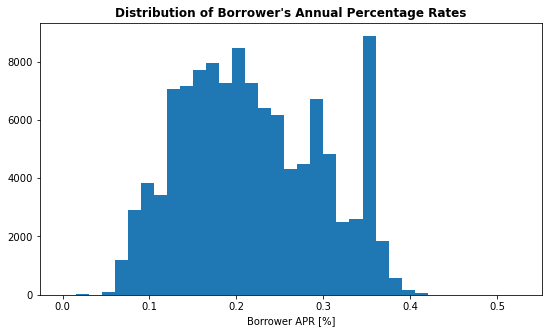

In [23]:
#plotting the distribution of borrower's APR
bins = np.arange(0, df["borrowerapr"].max()+0.015, 0.015)
plt.figure(figsize=[9, 5])
plt.hist(data = df, x = "borrowerapr", bins = bins)
plt.xlabel("Borrower APR [%]")
plt.title("Distribution of Borrower's Annual Percentage Rates", weight=("bold"));


From the above plot we can see that the distribution is multimodal. The highest peak is about 0.36%.

### What is the distribution of Borrower's rates?

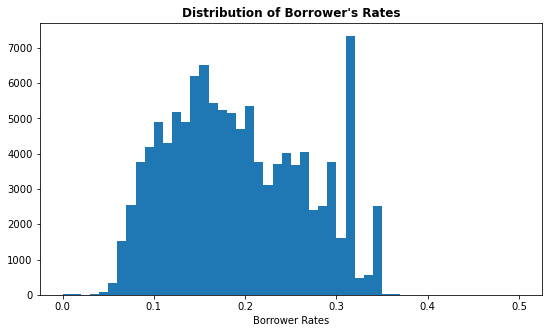

In [24]:
#plotting the distribution of borrower's rates
bins = np.arange(0, df["borrowerrate"].max()+0.01, 0.01)
plt.figure(figsize=[9, 5])
plt.hist(data = df, x = "borrowerrate", bins = bins)
plt.xlabel("Borrower Rates")
plt.title("Distribution of Borrower's Rates", weight=("bold"));

The above plot shows almost the same distribution as the Borrower APR plot, with its highest peak slightly above 0.3. This was mildly expected since the Borrower rate and other due rates when added make up the Borrower APR.

### What is the distribution of Propsper score?

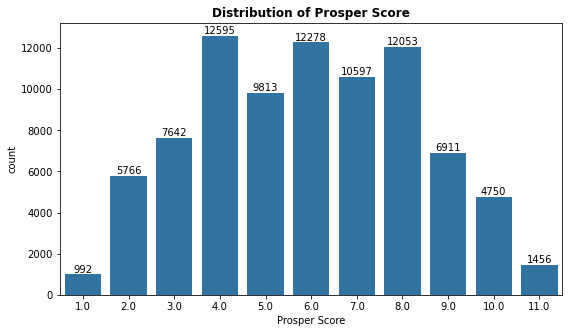

In [25]:
#plotting the distribution of proper score
base_color = sns.color_palette()[0]
plt.figure(figsize=[9,5])
ax= sns.countplot(data= df, x="prosperscore", color = base_color)
plt.xlabel("Prosper Score")
plt.title("Distribution of Prosper Score", weight= ("bold"))
ax.bar_label(ax.containers[0], label_type='edge');

From the above plot we can see that the prosper score is multimodal and that scores of 4, 6 and 8 are highly favoured.

### What is the Prosper rating distribution?

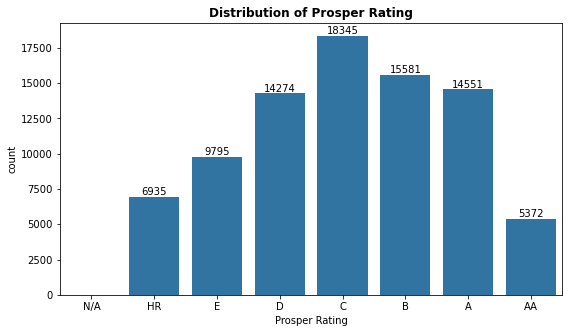

In [26]:
#plotting distribution of prosper rating
plt.figure(figsize=[9, 5])
ax= sns.countplot(data= df, x= "prosperrating", color= base_color)
plt.xlabel("Prosper Rating")
plt.title("Distribution of Prosper Rating", weight=("bold"))
ax.bar_label(ax.containers[0], label_type='edge');

From the above plot it is clear that individuals with the highest ratings are the least populated and also that the most popular rating is C with a count of 18345.

### How are borrowers distributed across several states?

In [27]:
#checking the borrower counts of each state programmatically
df.borrowerstate.value_counts();

In [28]:
#creating variables necessary for the plot
states_val = df.borrowerstate.value_counts()
arrange = states_val.index

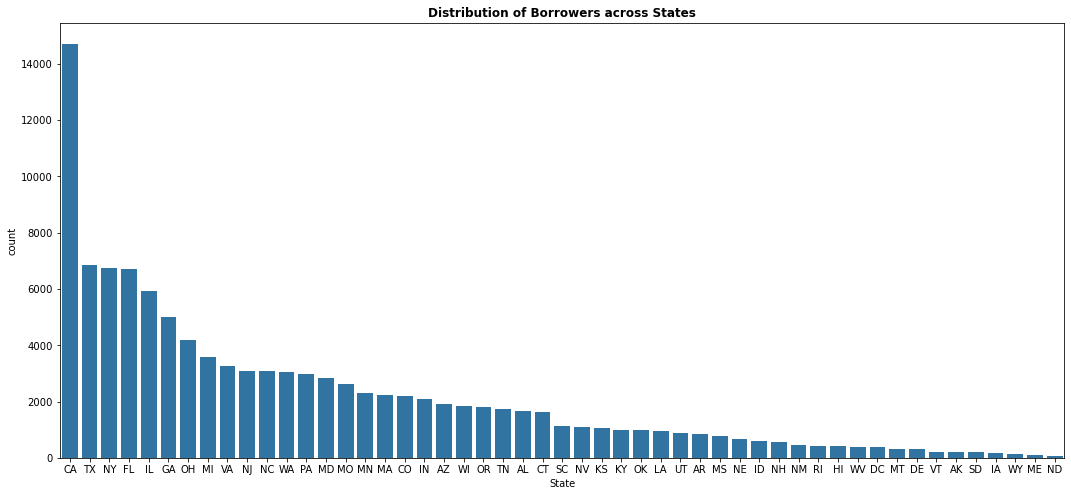

In [29]:
#plot creation
plt.figure(figsize=[18, 8])
sns.countplot(data= df, x= "borrowerstate", color= base_color, order = arrange)
plt.xlabel("State")
plt.title("Distribution of Borrowers across States", weight=("bold"));

From the above chart we can see that Carlifornia(CA) is the state with by far the most borrowers and North Dakota(ND) is the state with the least borrowers.

### What are the most common reasons for taking a loan?

In [30]:
#checking for the reasons why people take loans and their frequencies
df.listingcategory.value_counts();

In [31]:
#creating a variable comprising of the most common reasons and selecting the index
reasons = df.listingcategory.value_counts().head(10)
lcr = reasons.index

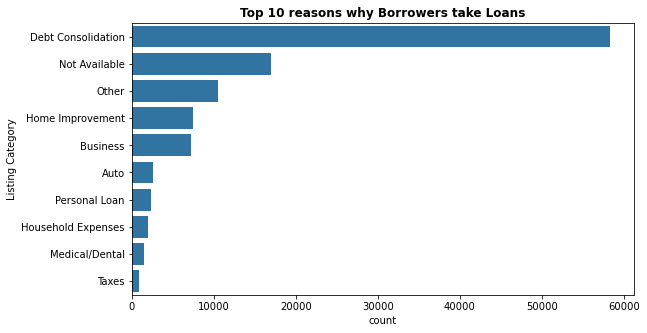

In [32]:
#creating the plot
plt.figure(figsize=[9, 5])
sns.countplot(data= df, y= "listingcategory", color= base_color, order = lcr)
plt.ylabel("Listing Category")
plt.title("Top 10 reasons why Borrowers take Loans", weight=("bold"));

From the above plot we can see that debt consolidation is the most prominent reason people take loans from prosper.

### What is the distribution of amount of loans taken?

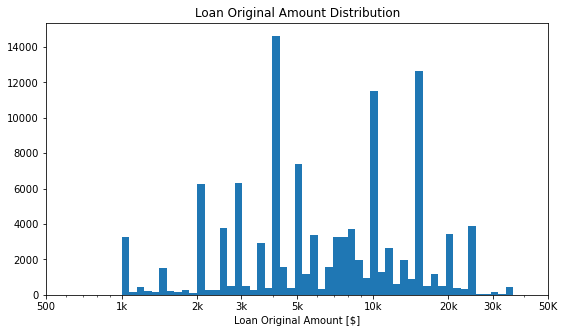

In [33]:
#plotting distribution of loans taken
bins = 10 ** np.arange(3, np.log10(df["loanoriginalamount"].max())+0.03, 0.03)
plt.figure(figsize=[9, 5])
plt.hist(data = df, x = "loanoriginalamount", bins = bins)
plt.title("Loan Original Amount Distribution")
plt.xscale("log")
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel("Loan Original Amount [$]");

The above plot shows that the amount loaned by borrowers is widely distributed and also greatly right skewed as it had to be transformed into a log scale. The highest peak is between $3-5k.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I had to increase the bin size of the Borrower APR to visualize it properly. The Borrower Rate is similar to the Borrower APR  as expected as the Borrower APR comprises of other expense rates including the Borrower Rate. I had to use a log scale transformation to get better insight into the Loan Amount as it was greatly right skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the features investigated had normal distributions and the ones that were skewed were transformed on a log scale for easier exploration. I also changed the Listing Category feature from the given numbers 1-20 to the actual values using a dictionary for better representation of the dataset.

## Bivariate Exploration

In this section, I will be investigating relationships between pairs of variables in this
dataset. I will also be answering questions including:
- Do larger original loan amounts attract higher APRs?
- What is the yearly trend in average Borrower APR?
- What is the yearly trend in average Borrower APR?
- How does income range affect Interest Rate?
- Do longer terms affect Interest rate and Anual Percentage Rate?
- How is the Loan amount being distributed by Term?
- What loan term are homeowners and non-homeowners most likely to take?

### Do larger original loan amounts attract higher APRs?

In [34]:
#creating a datframe with random set samples to tackle the enormous amount of data
apr_og = df.sample(n=20000, replace= False) 

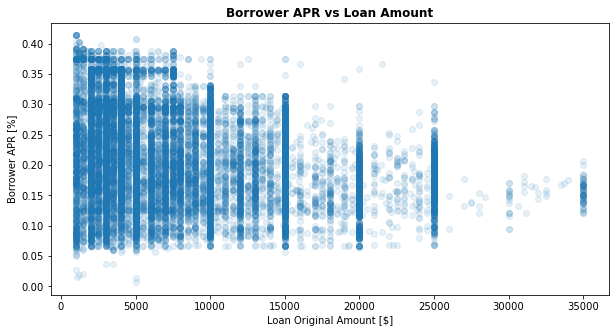

In [35]:
#plotting a scatterplot
plt.figure(figsize = [10, 5])
sns.regplot(data=apr_og, x="loanoriginalamount", y="borrowerapr", truncate=False, x_jitter=0.6, 
            scatter_kws={"alpha":1/9}, fit_reg=False)
plt.xlabel("Loan Original Amount [$]")
plt.ylabel("Borrower APR [%]")
plt.title("Borrower APR vs Loan Amount", weight=("bold"));

From the above plot it can be inferred that higher loan amounts creates a tendency for lower Annual Percentage Rates meaning there's a negative correlation between both features.

### What is the yearly trend in average Borrower APR?

In [36]:
#creating a dataframe containing average Borrower APRs for each year
avg_apr = df.groupby("year")["borrowerapr", "loanoriginalamount"].mean() 

C:\Users\subomi\AppData\Local\Temp\ipykernel_13700\786741863.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_apr = df.groupby("year")["borrowerapr", "loanoriginalamount"].mean()


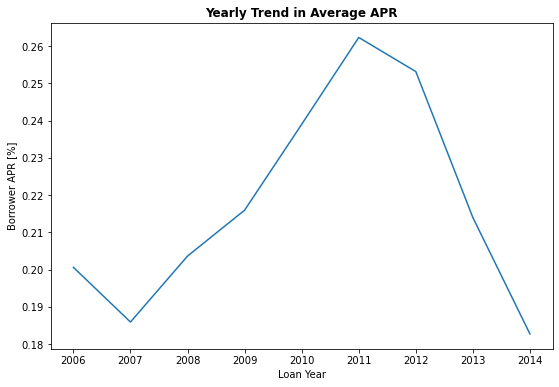

In [37]:
#plotting a line chart
plt.figure(figsize=[9,6])
sns.lineplot(data= avg_apr, x ="year", y = "borrowerapr")
plt.xlabel("Loan Year")
plt.ylabel("Borrower APR [%]")
plt.title("Yearly Trend in Average APR", weight=("bold"));

From the above plot we can see the rise in Borrower APR from 2007 to 2011 before a sharp dip in the APR. Next, let us see what the effect in drop of Borrower APR has on the amount of loans taken.

### What is the yearly trend in Loans Taken?

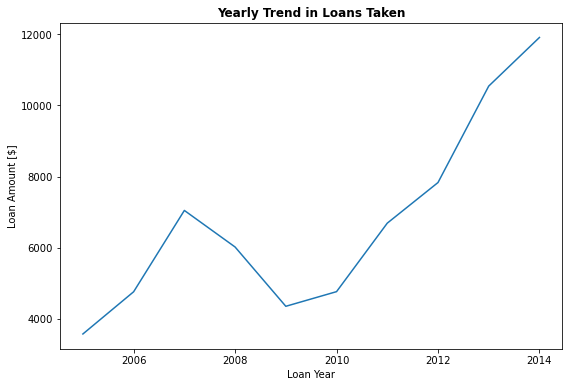

In [38]:
#plotting a line chart
plt.figure(figsize=[9,6])
sns.lineplot(data= avg_apr, x ="year", y = "loanoriginalamount")
plt.xlabel("Loan Year")
plt.ylabel("Loan Amount [$]")
plt.title("Yearly Trend in Loans Taken", weight=("bold"));

From the above plot we can see that the drop in APR from 2011 had a positive effect as loans taken grew exponentially.

### What is the correlation between Borrower APR, Borrower Rate, Loan Original Amount, Average Credit Score and Prosper Score?

In [39]:
#creating a list of required features
heatzy = ["borrowerapr", "borrowerrate", "loanoriginalamount", "avg_creditscore", "prosperscore"]

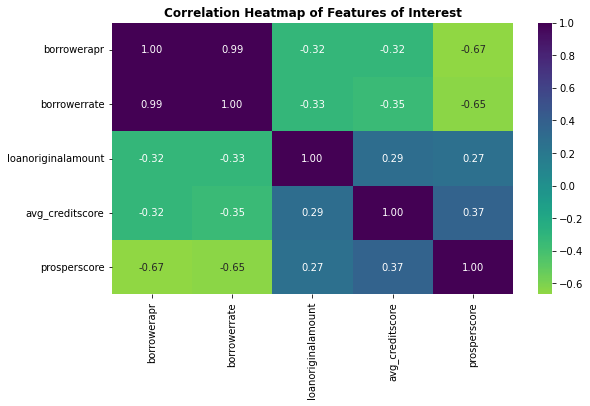

In [40]:
#plotting a correlation heatmap
plt.figure(figsize = [9, 5])
sns.heatmap(df[heatzy].corr(), annot = True, fmt = ".2f", cmap = "viridis_r", center=0)
plt.title("Correlation Heatmap of Features of Interest", weight=("bold")); 

From the heatmap we can see that Borrower APR and Borrower Rate are strongly positively correlated, but we already knew this. What is new to us here is the strong negative correlation between Prosper Score and both Borrower Rate and Borrower APR. We can also see that Loan Amount has a weak negative correlation with both Borrower Rate and Borrower APR and a weak positive correlation with the Average Credit Score and Prosper Score.


### How does income range affect Interest Rate?

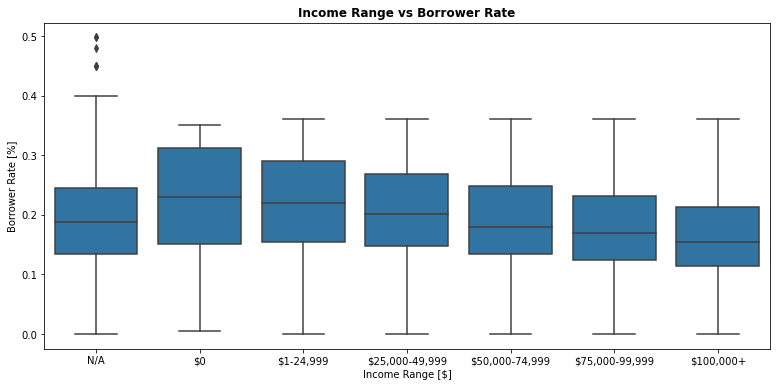

In [41]:
#making a boxplot
plt.figure(figsize=[13,6])
sns.boxplot(data=df, x="incomerange", y="borrowerrate", color = base_color)
plt.xlabel("Income Range [$]")
plt.ylabel("Borrower Rate [%]")
plt.title("Income Range vs Borrower Rate", weight=("bold"));

From the above plot we can see that the borrowers who earn the most are given lesser rates while those who earn lower get increased borrower rates.

### Do longer terms affect Interest rate and Anual Percentage Rate?

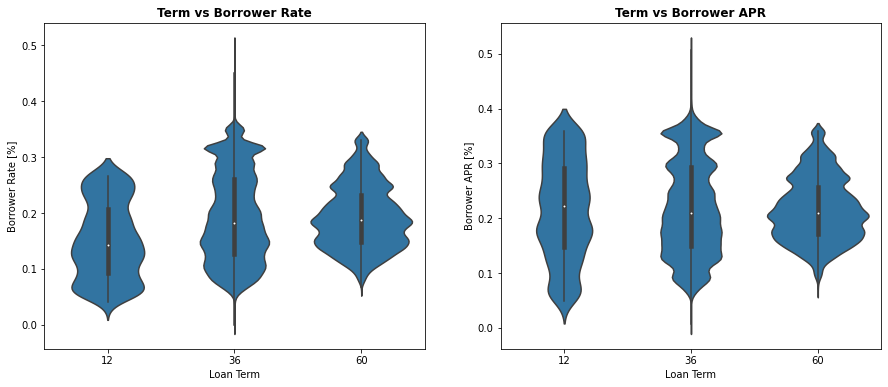

In [42]:
#creating two violin plots
plt.figure(figsize=[15,6])

plt.subplot(1, 2, 1)
ax = sns.violinplot(data=df, x="term", y="borrowerrate", color = base_color)
plt.xlabel("Loan Term")
plt.xticks()
plt.ylabel("Borrower Rate [%]")
plt.title("Term vs Borrower Rate", weight=("bold"))

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x="term", y="borrowerapr", color = base_color)
plt.xlabel("Loan Term")
plt.xticks()
plt.ylabel("Borrower APR [%]")
plt.title("Term vs Borrower APR", weight=("bold"));

From the above chart it can be inferred that longer loan terms have increased Borrower Rates. The higher a loan term the more interest it accrues, whereas the Borrower APR is more stable per term as the 25th and 75th percentile for 12 and 36 months are relatively the same.

### How is the Loan amount being distributed by Term?

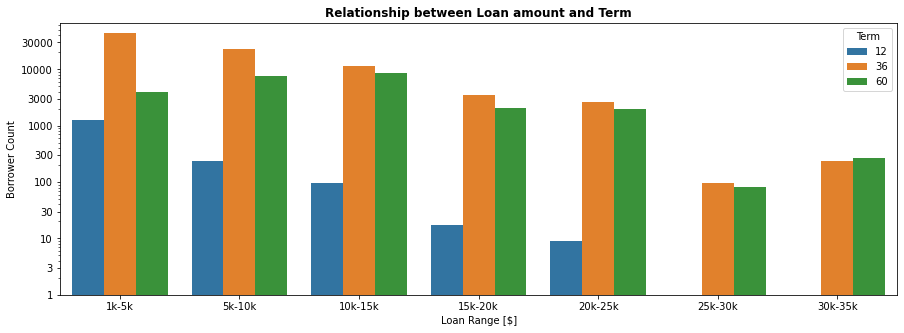

In [43]:
# using the cut function to create a new feature for range of loan amount
df["loan_range"] = pd.cut(df["loanoriginalamount"], bins=[1000,5000,10000,15000,20000,25000,30000,35000],
                          labels=["1k-5k","5k-10k","10k-15k","15k-20k", "20k-25k", "25k-30k", "30k-35k"])
#plotting a clustered bar chart
plt.figure(figsize = [15, 5])
sns.countplot(data=df, x="loan_range", hue="term")
ticks = [1, 3, 10, 30, 100, 300, 1000,3000,10000,30000]
labels = ["{}".format(v) for v in ticks]
plt.yscale("log")
plt.yticks(ticks, labels)
plt.xlabel("Loan Range [$]")
plt.ylabel("Borrower Count")
plt.legend(title="Term")
plt.title("Relationship between Loan amount and Term", weight=("bold"));

From the above plot we can see that borrowers do not take loans higher than \\$25k for 12 months or less. We can also see that most loans taken are between \\$1k-5k with 36 months being the most taken loan term for that loan range and also all other loan ranges except for loans higher than \\$30k.

### What loan term are homeowners and non-homeowners most likely to take?

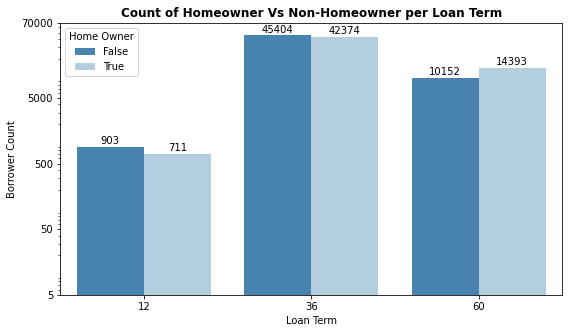

In [44]:
#plotting a clustered bar chart
plt.figure(figsize = [9, 5])
ax = sns.countplot(data=df, x="term", hue="isborrowerhomeowner", palette= 'Blues_r')
plt.xlabel("Loan Term")
ticks = [5, 50, 500, 5000, 70000]
labels = ["{}".format(v) for v in ticks]
plt.yscale("log")
plt.yticks(ticks, labels)
plt.ylabel("Borrower Count")
plt.title("Count of Homeowner Vs Non-Homeowner per Loan Term", weight=("bold"))
plt.legend(title="Home Owner")
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=1)

From the above plot we can see that homeowners only supercede non-homeowners in the longest loan term which is the 60 months. Non-homeowners take more of the 12 months and 36 months loan terms.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The distribution shows that the APR mean values were within the 0.2 range, with 2011 being the year with the highest APR rate. I noticed that some factors that have a tendency to increase the Borrower APR are smaller loan amounts and lower income. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was a shock to me that the loan terms had such an impact on the interest rates.

## Multivariate Exploration

In this section i will ask the following questions:
- How does the Loan Amount relate with the Term and if the Borrowers are home Owners?
- What is the yearly trend in Loan Amount and APR?
- What is the correlation between Borrower APR, Borrower Rate, Loan Original Amount, Average Credit Score and Prosper Score?

### How does the Loan Amount relate with the Term and if the Borrowers are home Owners?

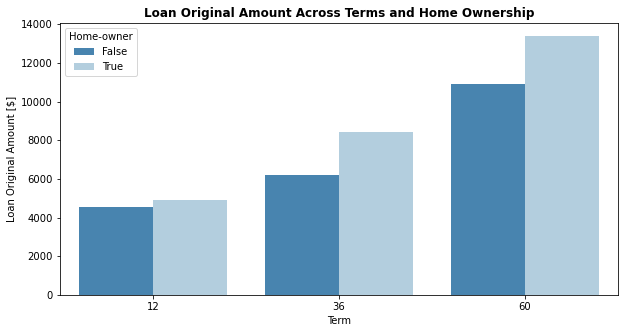

In [45]:
#plotting a barplot
plt.figure(figsize=[10,5])
sns.barplot(data = df, x = "term", y = "loanoriginalamount", hue = "isborrowerhomeowner", palette= 'Blues_r',  ci = None)
plt.xlabel("Term")
plt.ylabel("Loan Original Amount [$]")
plt.legend(title="Home-owner")
plt.title("Loan Original Amount Across Terms and Home Ownership", weight ="bold");

Though over 75% of the Borrowers are in the Term 36, Term 60 still has the highest Loan amount requested on average. Across all terms, Home Owners request for larger loan amounts than Borrowers who are not loan owners.

### What is the yearly trend in loan amount and APR?

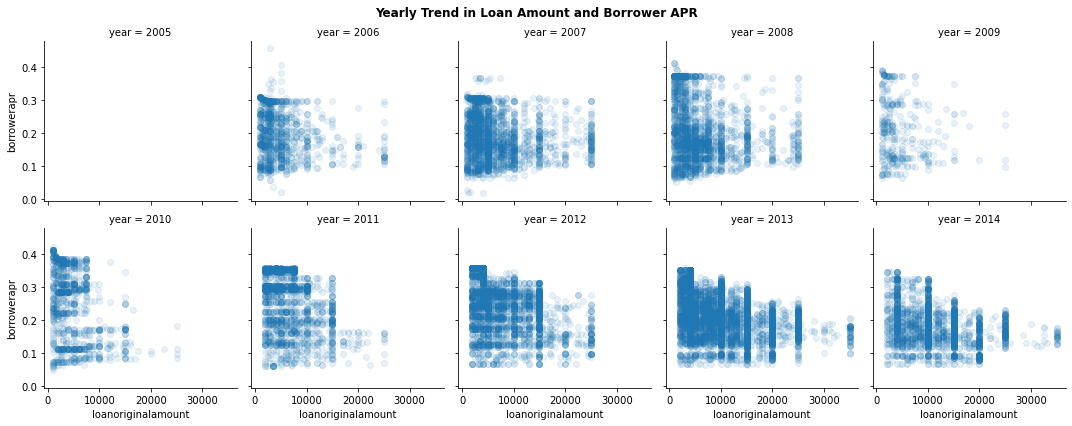

In [46]:
#using a datframe with random samples from main dataframe to construct the facet grid
sample = df.sample(n=20000, replace = False)
g = sns.FacetGrid(data = sample, col_wrap = 5, col = "year", height=3)
g.map(sns.regplot, "loanoriginalamount", "borrowerapr", x_jitter=0.7, scatter_kws={"alpha":1/10}, fit_reg= False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Yearly Trend in Loan Amount and Borrower APR", weight=("bold"));

From the above chart we can see that the loan amount never got over \\$30k until the year 2013. It can also be seen that there is a negative correlation between Loan Amount and Borrower APR which might be the reason for the rise and fall of the APR each year.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the investigation above we could see that loan amounts never went over \\$30k until 2013. We can also see the drop yearly in Annual Percentage Rate as loan amount increases. We can also see how the average credit score slightly influences the prosper score and is in direct proportion to the loan amount.

### Were there any interesting or surprising interactions between features?

> The Prosper Score was greatly negatively correlated with the Borrower APR.

## Conclusions
> To conclude, the Borrower APR had almost the same trend as the Borrowers rate. From the exploration of the loan, the data set reveals that the higher the Borrower Rating, the higher the Borrower's APR, and collecting loans for longer periods will increase the Borrower's APR. Most loans were collected for 3 years(12 months) and the Borrowers APR average was mostly around 0.2%. In addition, the homeowner distribution was almost even, and of the population who collected the highest loans, the homeowners dominated the range. Overall the Borrower APR will be crucial to consider when given out loans!


## Limitations

> The Exploratory Data Analysis is a good way to know the data using vivid and interesting visualizations. However, to make final statements about the  relationship among variables we need to conduct statistical tests and build predictive models.

## References

- https://stackoverflow.com/questions/63220741/how-to-plot-and-annotate-grouped-bars-in-seaborn-matplotlib
- https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime